<h1 style="font-size: 40px; margin-bottom: 0px;">4.1 Modeling biological phenomena (II)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

Today, we'll take what we've learned from 3-1 and apply it to modeling dynamic biological processes. We'll start today's notebook with what we ended on from last week's lecture, then we'll again begin gradually exploring slightly more complicated models using Python.

<strong>Learning objectives:</strong>
<ul>
    <li>Continue to practice for-loops and plotting</li>
    <li>Simulate dynamic processes over time using Python</li>
    <li>Simulating steady-state dynamics</li>
    <li>Modeling probabilistic phenomenon</li>
</ul>

In [1]:
#Import packages to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#These will allow us to poke around with performance and object sizes
import time
import sys

<h1 style="font-size: 40px; margin-bottom: 0px;">Simulating a dynamic process over time</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

Now that we have a better understanding of how to use for-loops to solve equations, we can begin to apply our knowledge to simulating dynamic processes. Today, we'll expand on what we've learned in last week's lecture, where we translated a basic descsriptive statement of bacterial growth into a mathematical expression.

```
The change in the number of bacteria over some period of time is dependent on the number of bacteria that actually divide.
```

So translating this into a mathematical expression:
<ul>
    <li>The change in the number of bacteria &rarr; <strong>dN</strong></li>
    <li>over &rarr; <strong>/</strong></li>
    <li>some period of time &rarr; <strong>dt</strong></li>
</ul>
The three above can be combined as &rarr; <strong>dN/dt</strong>
<ul>
    <li>is dependent on &rarr; <strong>&equals;</strong></li>
    <li>the number of bacteria that actually divide - which we determined to be dependent on:</li>
    <ul>
        <li>the number of bacteria present at some time point &rarr; <strong>N(t)</strong></li>
        <li>the average rate of division &rarr; <strong>r</strong></li>
    </ul>
</ul>

The above statement can be rewritten into:

```
dN/dt = N(t)*r
```

Which gives us an equation that we can rewrite into:

```
N(t + dt) = N(t) + N(t)*r*dt
```

This equation now tells us that the number of bacteria after some time <strong>N(t + dt)</strong>, can be calculated by taking into account the number of bacteria at the onset <strong>N(t)</strong> and their rate of division <strong>r</strong> and how much time passed <strong>dt</strong>. 

And this set up seems again awfully similar to a for loop. Let's compare it to a linear equation:

```
y(x) = m*x + b
```

We were able to translate our linear expression into something Python can interpret <code>y&lbrack;x&rbrack; = m*x + b</code> and we can do the same with our equation for bacterial growth:

```
N[t + dt] = N[t] + N[t]*r*dt
```

So we can set some values to be defined beforehand. Notably, we'll need to decide how long we'll let our <i>in silico</i> bacteria to divide <code>t_max</code>, and we'll need to decide on how often we want to check in on our <i>in silico</i> bacteria <code>dt</code>. Then, we can consider the parameters of our bacteria, specifically the starting number of bacteria <code>N&lbrack;0&rbrack;</code> and their average rate of division <code>r</code>.

In [7]:
#Let's set up our givens or our initial parameters
#It can be helpful to specify units within comments
#Mostly so that you remember what units you are working in for your simulation
t_max = 200 #min
dt = 1 #min

#Let's set up our array of zeros
N = np.zeros(int(t_max/dt))

#Let's specify how many bacteria we have to start with
N[0] = 1 #bacteria

#Let's specify how fast our bacteria divide
r = 0.02 #divisions per min (in other words 50 minutes to divide once)

#Let's set up our for-loop to run our simulation - simulating bacterial growth over time (exponential)
for t in np.arange(0, t_max - dt, dt):
    N[t + dt] = N[t] + N[t] * r * dt

Text(0, 0.5, 'Number of bacteria')

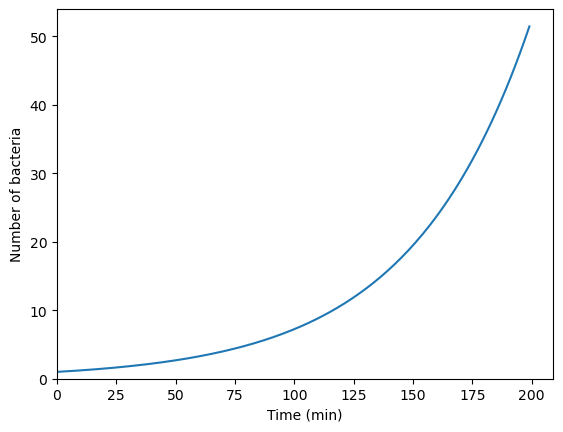

In [9]:
#Plot the bacteria numbers
plt.plot(N)

#Pretty up plot
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')

You can see that it's exponential growth, so let's plot it with a y-axis set to log scale, and if it is truly exponential, then we should see that the curve should be linear when we set the Y-axis scale to a log-scale.

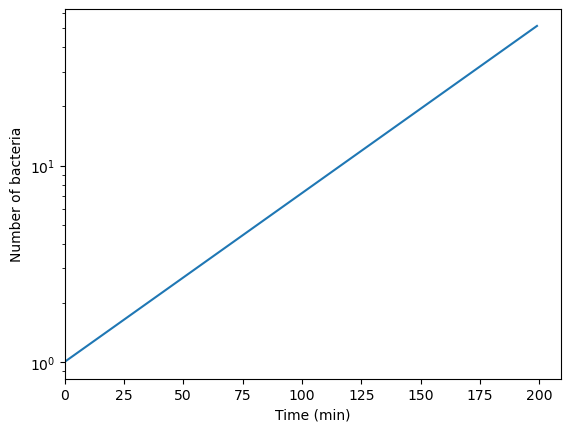

In [12]:
#Plot our bacteria
plt.plot(N)

#Adjust plot parameters to pretty it up
plt.xlim(0)
# plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
#Set yscale to log - if exponential then should see it as a line
plt.yscale('log')

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Adjusting simulation parameters</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

For this first exercise, play around with a few of our parameters for our bacterial growth equation:

<ul>
    <li><code>t_max</code></li>
    <li><code>N&lbrack;0&rbrack;</code></li>
    <li><code>r</code></li>
</ul>

As you play around with your parameters, see how the resulting simulation changes when you plot the results.

Text(0, 0.5, 'Number of bacteria')

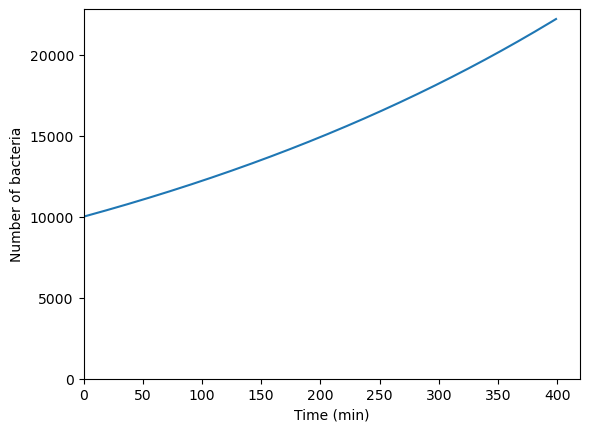

In [16]:
#Playing around with the three parameters adjusting the values and replotting to see output changes
#Let's set up our givens or our initial parameters
t_max = 400 #min
dt = 1 #min

#Let's set up our array of zeros
N = np.zeros(int(t_max/dt))

#Let's specify how many bacteria we have to start with
N[0] = 10000 #bacteria

#Let's specify how fast our bacteria divide
r = 0.002 #divisions per min (in other words 50 minutes to divide once)

#Let's set up our for-loop to run our simulation - simulating bacterial growth over time (exponential)
for t in np.arange(0, t_max - dt, dt):
    N[t + dt] = N[t] + N[t] * r * dt

#Plot the bacteria numbers
plt.plot(N)

#Pretty up plot
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Changing time step size (<code>dt</code>)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

Something you may have noticed is that changing <code>dt</code> was excluded from the previous exercise. This is because there are additional considerations when adjusting <code>dt</code>, our step size for time. In this exercise, see if you can specifically change our <code>dt</code> parameter that we have kept at 1 minute so far. What happens when your <code>dt</code> is set to be greater than 1? What about when it is less than one?

Text(0, 0.5, 'Number of bacteria')

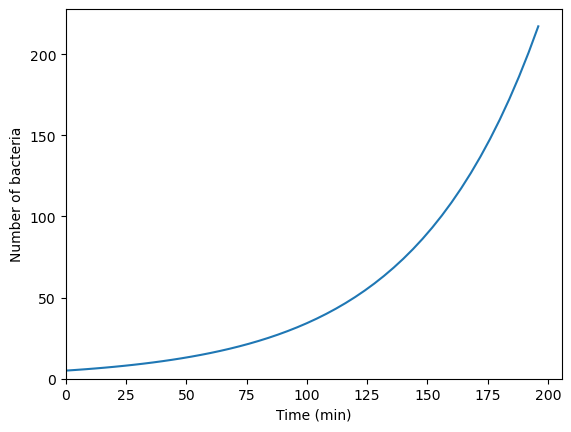

In [21]:
#Play around with dt value and rerun when dt >1 and when dt <1
#Let's set up our givens or our initial parameters
t_max = 200 #min
dt = 4 #min

#Let's set up our array of zeros
N = np.zeros(int(t_max/dt))

#Lets set up our position_list
position_list = np.arange(0, int(t_max/dt) - 1, 1) #jack way of setting it up - prevents out of bounds error
#can also be np.arange(1, int(t_max/dt), 1) but for-loop will need to be adjusted

#We also need to set up a time array
time_values = np.zeros(len(N))

#Let's specify how many bacteria we have to start with
N[0] = 5 #bacteria

#Let's specify how fast our bacteria divide
r = 0.02 #divisions per min (in other words 50 minutes to divide once)

#Let's set up our for-loop to run our simulation - simulating bacterial growth over time (exponential)
for t in position_list: #switch out our old indexer for the position_list
    N[t + 1] = N[t] + N[t] * r * dt #now update our equation so that we add to t + 1 instead of t + dt
    time_values[t + 1] = time_values[t] + dt #calculate our time values as we progress through for-loop

#Plot the bacteria numbers
plt.plot(time_values, N)

#Pretty up plot
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')

You'll likely have encountered an error when playing around with the <code>dt</code> initial parameter. Recall back to notebook 3-1, to identify a way to adjust how you set up your for-loop so that you can change <code>dt</code> and still run your simulation for bacterial growth.

How would we then adjust how we plot our results? Give it a try below to plot the results of your simulation.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #3: Overlay multiple simulations</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

This exercise will be a bit of a mix of simulation practice and also plotting. To make things easier, first set up a function that can run your bacterial growth simulation while allowing you to adjust the initial parameters.

In [22]:
#Define your bacterial simulation function
def bacterial_sim(t_max, dt, N_0, r):
    """
    Our givens or initial parameters can be what we pass to our function.
    So where we assign values to variables previously, this is handled by our function parameters.

    What we set up before:
    t_max = simulation 'run-time' with units in minutes
    dt = step size with units in minutes
    r = rate of bacterial division with units divisions per minute

    We'll need to keep the N[0] = starting number of bacteria in our function.
    We can have a parameter N_0 that we assign to N[0]. Units of N_0 is just number of bacteria.
    
    The rest of the function can be how we set up our simulation:
    Set up arrays.
    Specify number of starting bacteria.
    Set up our for-loop.

    Recall that variable scope for functions: 
    This means that we cannot use the variables, N or time_values, outside of this function.
    So we need it to return these variables to us as an output.
    That way, we can use the simulation results for plotting, downstream applications, etc.
    """
    #Set up our arrays
    N = np.zeros(int(t_max/dt))
    position_list = np.arange(0, int(t_max/dt) - 1, 1) 
    time_values = np.zeros(len(N))
    
    #Specify starting number of bacteria
    N[0] = N_0 #bacteria

    #Run simulation within function using for-loop
    for t in position_list:
        N[t + 1] = N[t] + N[t] * r * dt 
        time_values[t + 1] = time_values[t] + dt

    #Then the function will output two objects for us to use later
    return time_values, N

Now run three simulations changing various parameters and generate a plot where you overlay each of the three simulations.

In [27]:
#Run multiple simulations changing various parameters
#Need to assign to two variables since we have two outputs returned to us
#time_values will be our x-axis values
#N will be out y-axis values
x1, y1 = bacterial_sim(200, 1, 5, 0.02)
x2, y2 = bacterial_sim(200, 0.01, 5, 0.02)
x3, y3 = bacterial_sim(200, 5, 100, 0.002)

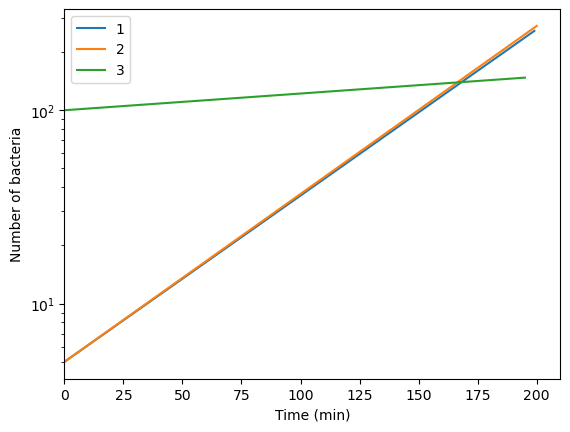

In [30]:
#Set up our plots to overlay on top of one another
fig, ax = plt.subplots()

plt.plot(x1, y1, label='1')
plt.plot(x2, y2, label='2')
plt.plot(x3, y3, label='3')

plt.legend()
plt.xlim(0)
# plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')

#If we want to see in log-scale on the y-axis
plt.yscale('log')
plt.show()

Now what happens if you keep all starting parameters the same, but only change <code>dt</code> for three simulations? What happens when you run three simulations each with <code>dt</code> that are an order of magnitude or more in difference?

In [31]:
#Change only the dt between simulations
x1, y1 = bacterial_sim(200, 0.005, 10, 0.02)
x2, y2 = bacterial_sim(200, 1, 10, 0.02)
x3, y3 = bacterial_sim(200, 5, 10, 0.02)

#The duration, starting number of bacteria, and their rate of division are all the same
#So biologically, we should expect to see the same growth curve

Let's take a look at the results of our simulations.

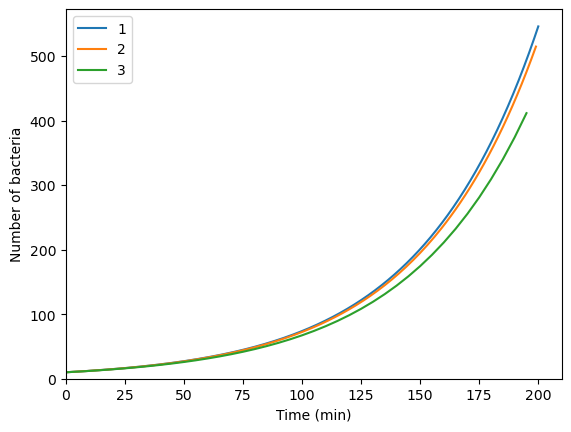

In [32]:
#Overlay plots to see if there is a difference in simulations when changing only dt
fig, ax = plt.subplots()

plt.plot(x1, y1, label='1')
plt.plot(x2, y2, label='2')
plt.plot(x3, y3, label='3')

plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
# plt.yscale('log')
plt.show()

#Will see a difference in growth curves - this is due to integration error
#Conceptually similar to Riemann's sums and integrals in calculus
#Large intervals leads to less accurate estimations in Riemann's sums
#Conceptually the same thing here. If dt is too large, not enough calculations to be accurate

<h1 style="font-size: 40px; margin-bottom: 0px;">Considerations for <code>dt</code> step size</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

If you take a look at our three simulations where we only changed the <code>dt</code>, you can see that the results of the simulation ended up fairly different from one another. Which one is more reflective of real biology? Our rate of division has not been changed, only our <code>dt</code>. Yet from our simulation, we now see that the simulations diverge from one another. From what we know, if our rate of division and our number of starting bacteria is unchanged, it shouldn't matter how often we take a timepoint. But in our computational simulations, we can see that it makes a difference in our calculations.

This sort of issue that we're seeing, which is an issue for computational simulations of biological processes, is called an integration error or dt error. When modeling biological phenomenon by solving ordinary differential equations as we have been doing, a source of error is the <code>dt</code> time step. Although earlier we referred to our <code>dt</code> as how often we're "observing" our <i>in silico</i> bacteria, we are really just predicting the number of bacteria expected to be at each time point. 

We know that biological processes are continuous, and our computational simulation can only perform a finite number of calculations, meaning that it can only advance in "time" in discrete intervals. Therefore, unlike the mathematical expressions that we solved in notebook 3-1, the calculation at each time point is dependent on the results of the previous time point, which means that differences in "sampling" intervals will affect the simulation. Recall from your calculus classes and when you learned Riemann's sums, and how the interval affects the accuracy of your estimation vs calculating the derivative. What we see with integration errors is similar, where a <code>dt</code> that is too large will not be able to accurately model the system.

In short, when setting up simulations, you need to consider the effect of your step size on your simulation because like how the interval size for a Riemann's sum affects how accurately it estimates a continuous interval, your step size will also affect your model's ability to predict/simulate real-world processes.

Let's take a look in the code cell below using our bacteria growth function that we set up earlier.

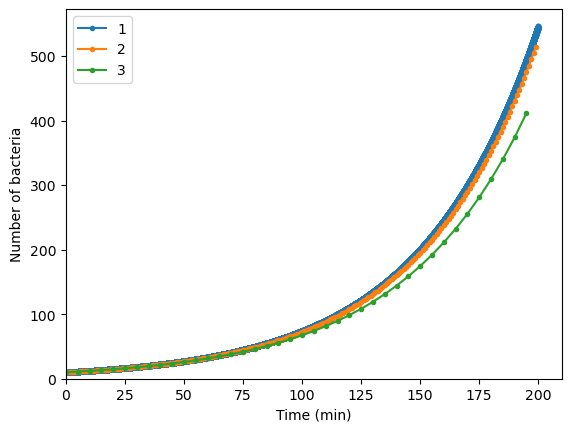

In [34]:
#Repeat same simulation as before pulling everything into a single code cell
x1, y1 = bacterial_sim(200, 0.005, 10, 0.02)
x2, y2 = bacterial_sim(200, 1, 10, 0.02)
x3, y3 = bacterial_sim(200, 5, 10, 0.02)

fig, ax = plt.subplots()

#Plot but add in line style (ls) and dots for markers,
#so we can see each "calculation"
plt.plot(x1, y1, ls='-', marker='.', label='1')
plt.plot(x2, y2, ls='-', marker='.', label='2')
plt.plot(x3, y3, ls='-', marker='.', label='3')

plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
# plt.yscale('log')
plt.show()

We need to also consider the dynamics of the system we're modeling relative to our step size. Let's now hold step size constant but change the rate of bacterial division in a few simulations. 

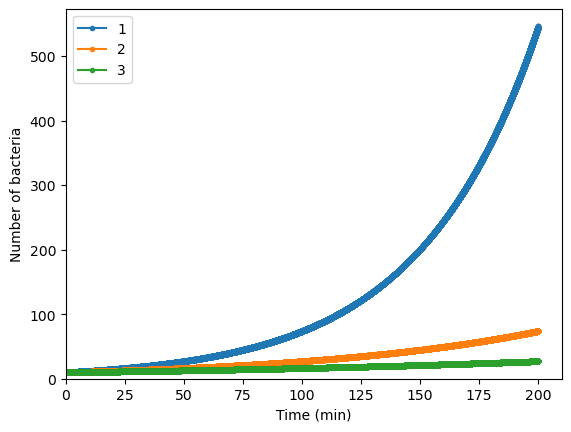

In [35]:
#Rerun simulations with different rates of division
#Currently showing reducing rates of division
x1, y1 = bacterial_sim(200, 0.005, 10, 0.02)
x2, y2 = bacterial_sim(200, 0.005, 10, 0.01)
x3, y3 = bacterial_sim(200, 0.005, 10, 0.005)
#If instead increase rate of division, there will be divisions occurring that our calculations will miss.

fig, ax = plt.subplots()

plt.plot(x1, y1, ls='-', marker='.', label='1')
plt.plot(x2, y2, ls='-', marker='.', label='2')
plt.plot(x3, y3, ls='-', marker='.', label='3')

plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
# plt.yscale('log')
plt.show()

You can see that it's the relationship between the rate in which our dynamic process is occurring relative to our simulations step size that impacts the accuracy of our simulation. For our bacterial growth model, our prediction's accuracy is therefore dependent upon the rate of bacterial division and how frequently we perform our calculations. 

It's tempting to simply then have a very, very small <code>dt</code> that is many orders of magnitude smaller than your fastest dynamic process that you're trying to simulate. However, you will also need to balance the computational burden that a really small <code>dt</code> will create since you will greatly increase the number of calculations that you are performing. Something slightly less intuitive that you also need to consider is that with very small <code>dt</code>, rounding error will eventually limit how accurate your calculations can be. Recall that the way floats are represented in Python result in small inaccuracies, so at some point, these inaccuracies limit the exactness of your calculations.

Generally, you don't want a step that is too small, which can slow down your simulations because you are performing too many calculations that don't really reduce the error of your model in a meaningful way, and you don't want a step size that is too large, which could lead to integration errors. And a helpful rule of thumb is to keep halving your <code>dt</code> until your simulation estimatations remain roughly the same, within some acceptable error. Let's give that a try in the below exercise.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #4: Sequentially halving <code>dt</code></h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

For this exercise, see if you can make use of your bacterial growth function that you defined earlier along with what you know about for-loops and plotting to see if you can set up a for-loop where you sequentially halve your <code>dt</code> and plot the results of your simulation each time overlaid over the previous simulation.

Time to run simulation:  0.0002 sec
Time to run simulation:  0.0003 sec
Time to run simulation:  0.0007 sec
Time to run simulation:  0.0015 sec
Time to run simulation:  0.0029 sec
Time to run simulation:  0.0054 sec
Time to run simulation:  0.0109 sec
Time to run simulation:  0.0220 sec
Time to run simulation:  0.0441 sec
Time to run simulation:  0.0889 sec
Time to run simulation:  0.1885 sec
Time to run simulation:  0.3563 sec
Time to run simulation:  0.6908 sec
Time to run simulation:  1.4144 sec
Time to run simulation:  2.8057 sec


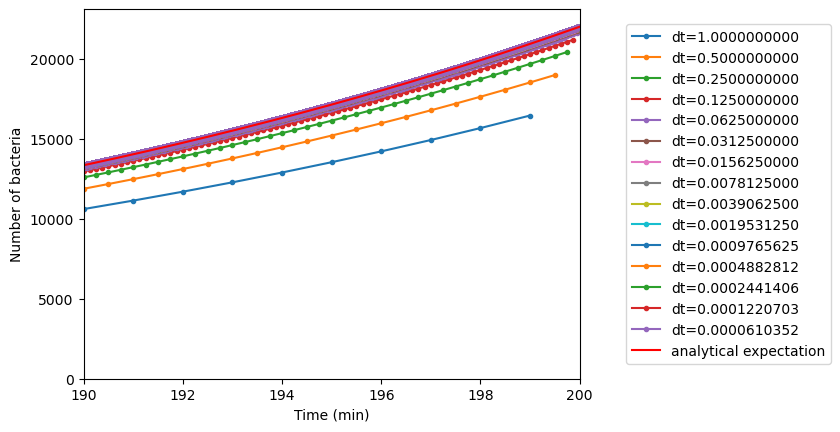

In [37]:
#Small practice with for-loops and thinking about how to set up to halve dt each iteration
#Purpose of this is to demonstrate increased computational demand with diminishing returns on how much more accurate it is

#Set up plot area for overlaying plots
fig, ax = plt.subplots()

#Set up for-loop for sequentially halving dt
for i in np.arange(0, 15, 1):
    #Take the time at start of one simulation for assessing performance
    start_time = time.perf_counter()

    #Each time for-loop iterates, the dt is halved
    dt = 1/(2**i)

    #Run simulation
    x1, y1 = bacterial_sim(200, dt, 1, 0.05)

    #Take the time at the end of one simulation
    end_time = time.perf_counter()

    #Plot each simulation overlaying on top of previous plot in plotting area
    plt.plot(x1, y1, marker='.', label=f'dt={dt:.10f}')

    #Output the time to run simulation for each iteration of for-loop
    print(f'Time to run simulation: {end_time - start_time : .4f} sec')

#We can also set up an analytical expresison of our equation and solve
analytical_expectation = np.exp(0.05 * np.arange(0, 200, dt))

#Plotting the analytical expression of our equation on top of everything else
plt.plot(np.arange(0, 200, dt),
         analytical_expectation,
         color='r',
         label='analytical expectation'
        )

#Pretty up plot
ax.legend(loc='center',
          bbox_to_anchor=(1.3, 0.5)
         )
plt.xlim(190, 200)
plt.ylim(0)
plt.xlabel('Time (min)')
plt.ylabel('Number of bacteria')
plt.show()

What you should be able to see is that the simulation takes longer and longer to run and also demands much more memory when we use much much smaller step sizes with a diminishing benefit in terms of how much more accurate our simulation is, .

If we're feeling brave, recall that we can also set up for-loops and generate usable outputs using lists instead of arrays; however, lists are much more memory-intensive as a result of how they store and access elements. Let's set up our final simulation with the smallest dt we used and compare the compute time and memory usage.

In [38]:
#Quick check to see what last value of i was for our for-loop
#We will use this value for a simulation using lists
print(i)

14


In [39]:
#For fun: compare the final loop of our array-based simulation compared to a list one

#Take time at the start to assess performance
start_time = time.perf_counter()

#Set up parameters and compound data types
t_max = 200
dt = 1/2**14
N = [] #We are using a list to hold our outputs now
N.append(1) #Append initial value to empty list giving it a size of 1
r = 0.05
time_values = [] #We can do the same for our time values
time_values.append(0)
position_list = np.arange(0, int((t_max/dt) -1), 1)

#Run our simulation, this time adjusting to append to our list
for t in position_list:
    calculation = N[t] + N[t]*r*dt
    N.append(calculation)
    time_values.append(dt*t)

#Assess the end time
end_time = time.perf_counter()

#Output the time it takes to run this simulation
print(f'Time to run simulation: {end_time - start_time : .4f} sec')

Time to run simulation:  5.4596 sec


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #4: Model logistic growth</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

Let's try to simulate what happens when the environment that our <i>in silico</i> bacteria has a carrying capacity <strong>K</strong>, which dynamically affects the rate of bacterial proliferation, with reduced rates of proliferation as the population reaches the carrying capacity.

We know from Verhulst that logistic growth can be modeled with the following differential equation:

```
dN/dt = N(t)*r*(1- N(t)/K)
```

See if you can figure out how to translate this differential equation into an expression that we can use to model logistic growth of our bacteria.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #5: Simulate mRNA dynamics</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Like with bacterial growth, we can also simulate the levels of mRNA. We know that mRNA is produced at some constant rate <strong>r</strong>. And we know that mRNA will have some rate of decay <strong>gamma</strong> that is dependent on the levels of mRNA (if there's no mRNA, then there's nothing to decay). So after some given time step <strong>C(t+dt)</strong>, we can model the levels of mRNA by taking into account the number of mRNA that we had at the previous timepoint <strong>C(t)</strong>, how many mRNA were made in the interval <strong>(r times dt)</strong>, and how many decayed <strong>(gamma times dt times C(t))</strong>.

That gives us the following equation:

```
C(t+dt) = C(t) + r*dt - gamma*dt*C(t)
```

See if you can use that equation to then simulate mRNA dynamics with the initial parameters given in the code cell below:

Now let's plot the results of our simulation.

Now what if we have a starting mRNA number of 40? How does that change the dynamics of our mRNA?

Now plot the results of your new simulation.

How does the plot look in comparison to when the starting level of mRNA was at 5 mRNA molecules? Go ahead and overlay both simulation results.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #6: Simulating 1D diffusion via coin flips</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 900px;"></hr>

Diffusion can be modeled using a random walk, where we essentially "flip a coin" to determine whether our molecule moves in one direction or another. To do this, you can make use of either <code>np.random.randint()</code> or a uniform random number generator <code>np.random.uniform()</code> along with a conditional statement.

<a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html" rel="noopener noreferrer" target="_blank"><u>Documentation for <code>np.random.randint()</code> can be found here.</u></a>

<a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html" rel="noopener noreferrer" target="_blank"><u>Documentation for <code>np.random.uniform()</code> can be found here.</u></a>

See if you can set up a random number generator to model one-dimensional diffusion using what you learned in this notebook and what you know about conditional statements to control how code is executed. You can assume that the molecule can only move in one direction or the other when setting up your simulation.

Once you have your simulation set up, plot the results of your simulation.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #7: Model multiple molecules simultaneously</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

This exercise will be a bit of a challenge. See if you can take what you know to set up a <u>nested for-loop</u> that will allow you to model the 1D diffusion of multiple molecules simultaneously using the coin flip method you used in exercise 6.

You'll need to set up in this case, a 2D array (a matrix) where each row corresponds to the position of a single molecule and each column corresponds to individual molecules. So the matrix will look something like this table:

<table>
    <tr style="background-color: transparent; border: none;">
        <td style="background-color: transparent; border: none;"></td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_1</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_2</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_3</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Mol_4</td>
    </tr>
    <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_1</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_2</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_3</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_4</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
    </tr>
        <tr style="background-color: transparent; border: 1px solid; border-color: #000000;">
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;">Flip_5</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: transparent; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
</table>

Let's generate a plot of all our molecules as they move through 1D space over time.

We can adjust our plot parameters to reduce the opacity of each line and then change the color to black. This will give us a visual idea of the distribution based on the degree of overlap.

Let's now visualize the distribution as a histogram.

We can also plot the distribution as a simulated cumulative distribution function, where the X-axis is the position of a molecule in space, and the Y-axis is the sorted molecule or the proportion of molecules before that position on the X-axis.

<h1 style="font-size: 40px; margin-bottom: 0px;">Simulate mRNA dynamics in response to an oscillating transcription factor</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

If we have some extra time, let's try to come up with an ad hoc simulation of mRNA dynamics when mRNA is only produced once a transcription factor reaches some threshold concentration. For this, we can make use of the <code>np.sin()</code> function to represent oscillating levels of a theoretical transcription factor.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.sin.html" rel="noopener noreferrer"><u>Documentation for <code>np.sin()</code> can be found here.</u></a>

We can make use of our mRNA steady-state equation:

```
C(t+dt) = C(t) + r*dt - gamma*dt*C(t)
```

And then incorporate an interaction where rate of mRNA production is also dependent on the efficiency of transcription factor binding and activation.

```
C(t+dt) = C(t) + r*c*dt - gamma*dt*C(t)
```

Where lowercase <code>c</code> is the efficiency of transcription factor binding and activation to turn on transcription of the target mRNA.